In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
#import dataset
my_data=pd.read_csv("titanic_data.csv")
my_data[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#drop two irrelevant column
my_data.drop(['PassengerId'], axis = 1,inplace = True) 
my_data.drop(['Cabin'], axis = 1,inplace = True) 

In [4]:
#check null value
my_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [5]:
#drop null values
my_data.dropna(axis=0,inplace=True)

In [6]:
#check null value
my_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ABF6D91DD8>,
      dtype=object)

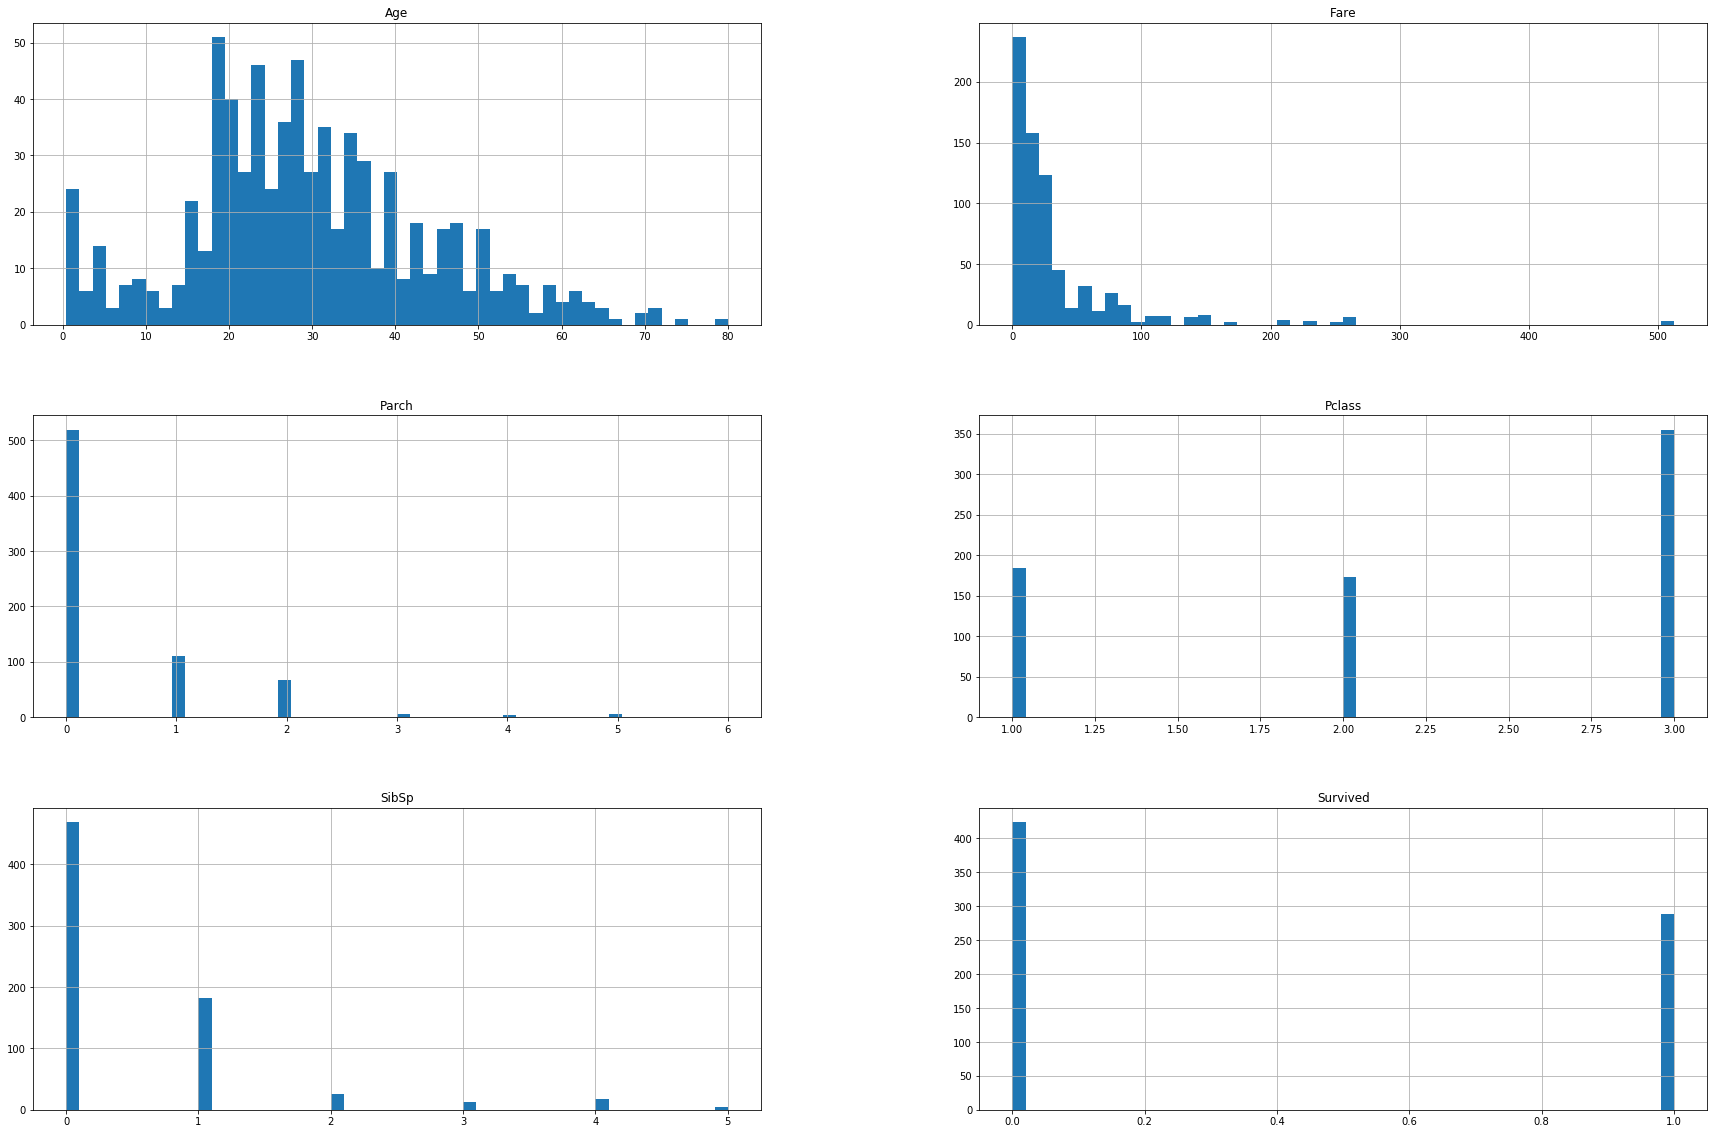

In [7]:
#checking data histogram
my_data.hist(bins=50, figsize=(30,20))

In [8]:
#check data type
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [9]:
#define Train 
X=my_data[['Pclass', 'Sex', 'Age','SibSp','Parch','Embarked']].values

In [10]:
#lebel encoding in sex column
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
transform_sex= LabelEncoder()
X[:,1]=transform_sex.fit_transform(X[:,1])
Z=pd.DataFrame(X)

In [11]:
X[:,1]
X

array([[3, 1, 22.0, 1, 0, 'S'],
       [1, 0, 38.0, 1, 0, 'C'],
       [3, 0, 26.0, 0, 0, 'S'],
       ...,
       [1, 0, 19.0, 0, 0, 'S'],
       [1, 1, 26.0, 0, 0, 'C'],
       [3, 1, 32.0, 0, 0, 'Q']], dtype=object)

In [12]:
X[:,5]

array(['S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'C',
       'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S',
       'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'C',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'Q', 'C', 'S', 'S',
       'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S

In [13]:
#label encoding in embarked column
transform_emb= LabelEncoder()
X[:,5]=transform_emb.fit_transform(X[:,5])
Z=pd.DataFrame(X)

In [14]:
X[:,5]


array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,

In [19]:
#standerdize the values
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X)
scaled_df.head(5)


,0,1,2,3,4,5
0,3.0,1.0,22.0,1.0,0.0,2.0
1,1.0,0.0,38.0,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,2.0
3,1.0,0.0,35.0,1.0,0.0,2.0
4,3.0,1.0,35.0,0.0,0.0,2.0


In [20]:
#check the eigen values
X = scaled_df.to_numpy()
X = X.astype(np.float)
u, s, vh = np.linalg.svd(X,full_matrices=True, compute_uv=True)
s

array([882.78620906,  48.07408321,  26.80592836,  18.6661906 ,
        18.34416532,  11.89004831])

In [21]:
#get main parameters with pca components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
principalComponents

array([[ -7.6587732 ,  -0.23918002,  -0.74950909,  -0.601263  ,
          0.1895677 ],
       [  8.37599298,   0.55262459,   1.85338543,  -0.67546649,
          0.40229452],
       [ -3.64421099,  -0.77491119,  -0.553813  ,   0.19746095,
          0.07118691],
       ...,
       [-10.59843752,  -0.60775301,   0.94525336,   0.01942642,
         -1.41845349],
       [ -3.5950295 ,  -0.53607945,   2.0842303 ,  -0.15162533,
          0.18607135],
       [  2.35791541,  -0.75398445,  -0.09717737,   0.02899786,
          0.94930249]])

In [22]:
#train output
y=my_data["Survived"]
y[0:5]


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
#split dataset with train and test
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=.2,random_state=4)

In [36]:
#decision tree 
Tree = DecisionTreeClassifier(criterion='entropy',max_depth= 4 )
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
#prediction with our model
predTree=Tree.predict(X_testset)

In [40]:
print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
808    0
326    0
142    1
482    0
243    0
Name: Survived, dtype: int64


In [41]:
#Accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("Dicision accuracy",metrics.accuracy_score(y_testset,predTree))

Dicision accuracy 0.8181818181818182


In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, predTree)

array([[84,  3],
       [23, 33]], dtype=int64)

In [43]:
#F1 score
from sklearn.metrics import f1_score
f1_score(y_testset, predTree)

0.717391304347826

In [44]:
#precision
from sklearn.metrics import average_precision_score

average_precision_score(y_testset, predTree)

0.7010177322677322

In [47]:
#create roc_roc curve
import matplotlib.pyplot as plt  
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_testset, predTree)
roc_auc = metrics.auc(fpr, tpr)
plt.show() 

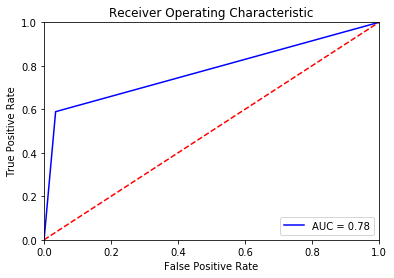

In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()